# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [3]:
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

In [4]:
# loading data
data = pd.read_csv('used_device_data.csv')


## Data Overview

- Observations
- Sanity checks

In [5]:
#showing the first 5 rows of the dataset
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [6]:
# Checking the shape of the dataset
data.shape

(3454, 15)

# Observation:
There are 3454 rows and 15 columns in the data

In [7]:
# checking for the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

# Observations

There are 3 datatypes : float64(9), int64(2), object(4)

There are four object type columns including brand_name , os , 4g , 5g

The release_year and days_used columns are of int64 data type

and the rest are all float64 including screen_size , main_camera_mp        selfie_camera_mp int_memory , ram , battery ,weight , normalized_used_price , normalized_new_price   

From the non-null count, there are some columns are missing values as the total count does not sum up to the total number of rows in the data.

# Statistical summary of the dataset

In [8]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


In [9]:
# Checking for duplicate values
data.duplicated().sum()

0

* There are no duplicate values in the data


In [10]:
# Checking for missing values

In [11]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are missing values in many columns , especially main_camera_mp.

In [12]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [13]:
# The below functions need to be defined to carry out the EDA.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


In [14]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
plt.show() # show the plot


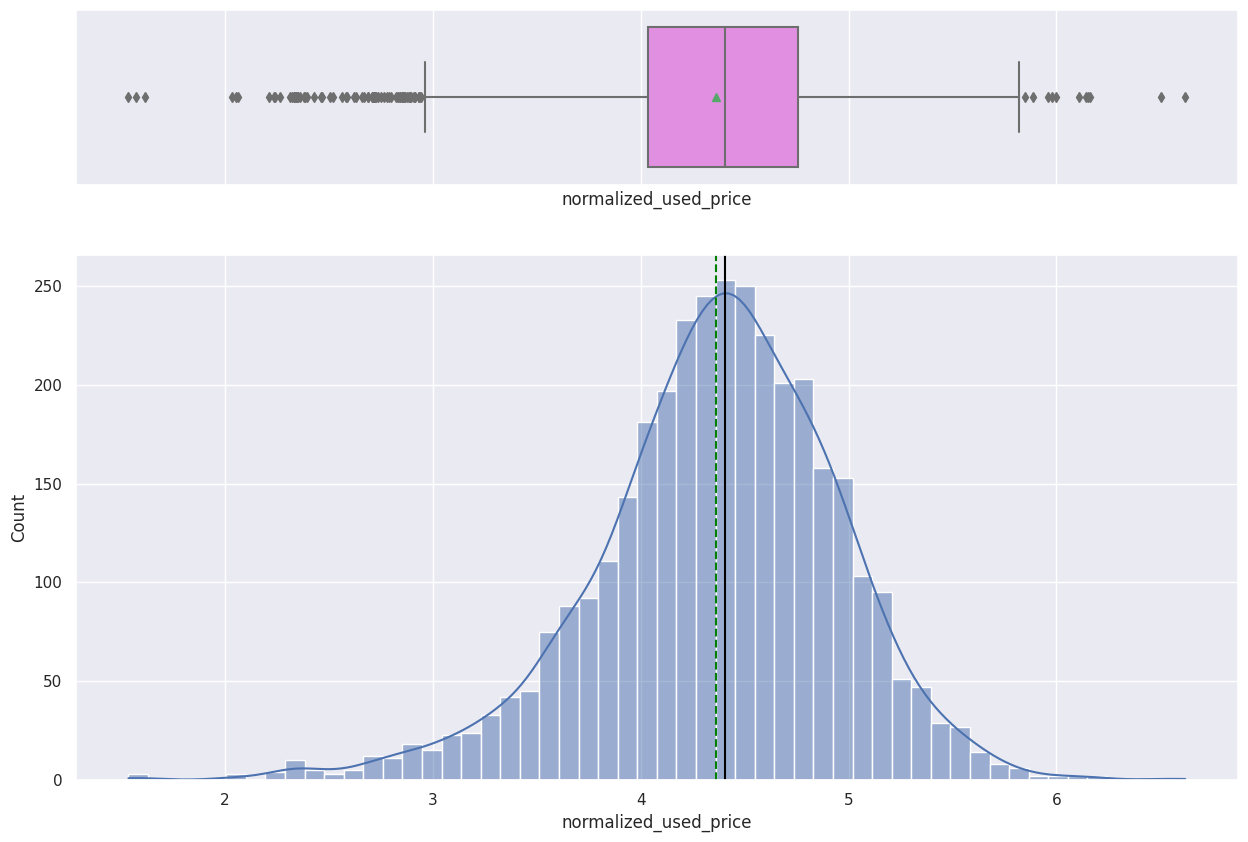

In [15]:
# normalized_used_price
histogram_boxplot(df, "normalized_used_price",kde=True)

# Observation:
1. What does the distribution of normalized used device prices look like?
* The distribution for normalized used price shows a normal distribution.
* There are some outliers on both sides.


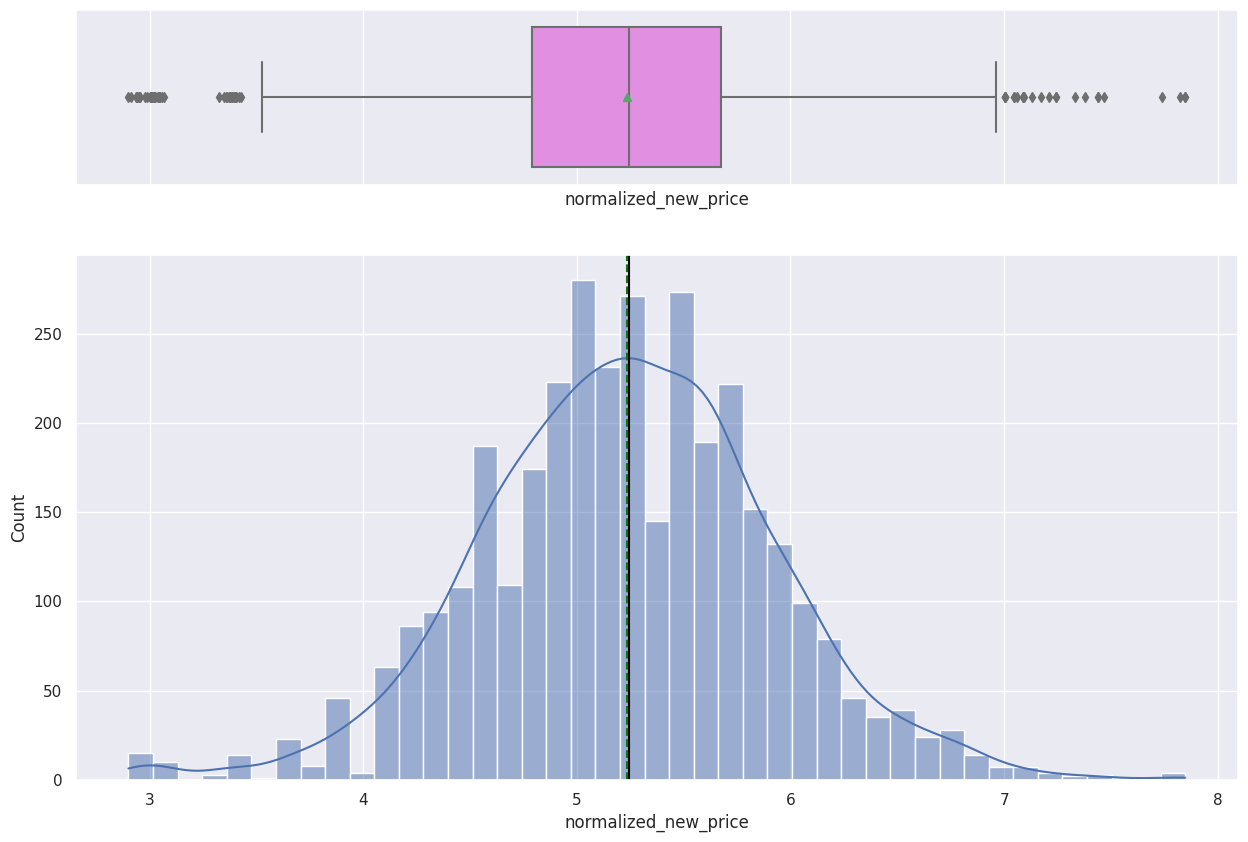

In [16]:
# normalized_new_price
histogram_boxplot( df,"normalized_new_price",kde=True)

# Observation:

* The distribution for 'normalized_new_price'is normally distributed.
* There are some outliers on both sides.

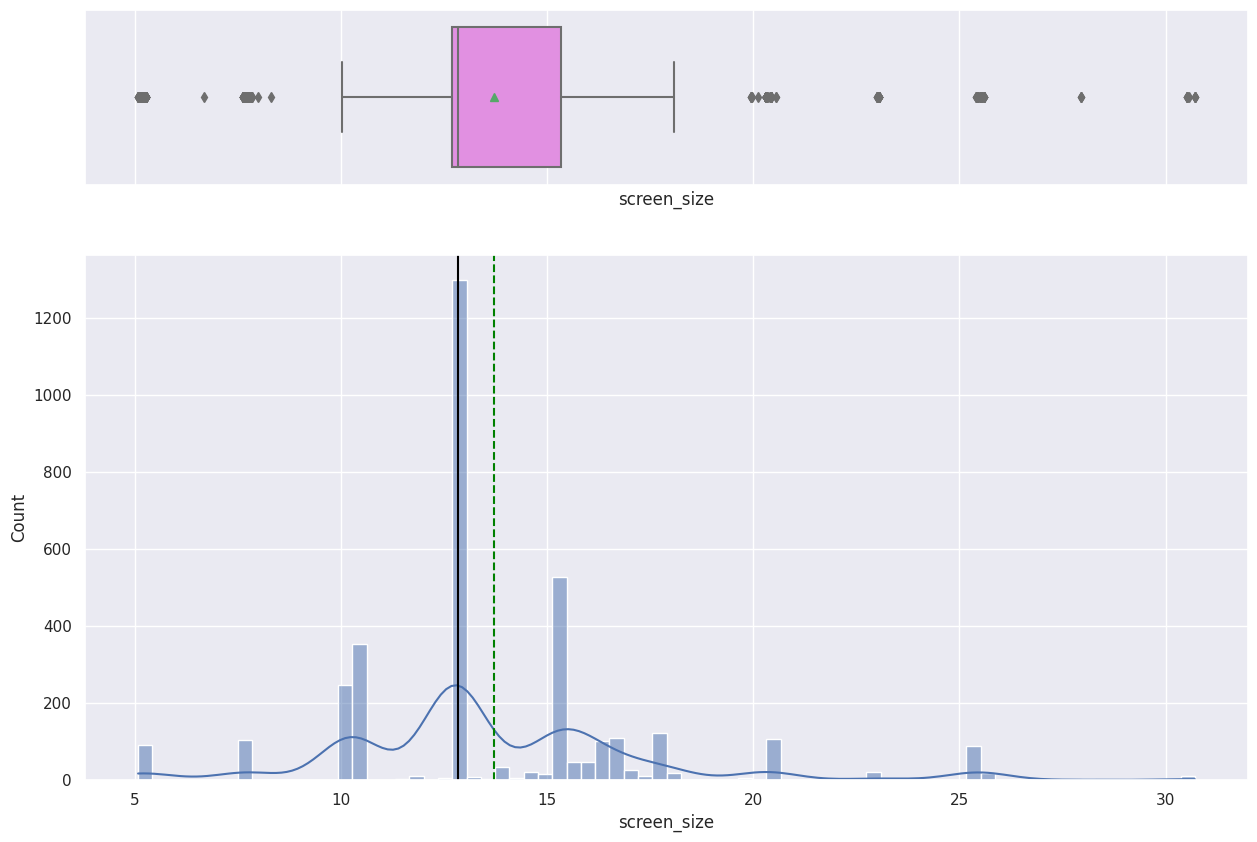

In [17]:
# screen_size
histogram_boxplot(df, "screen_size",kde=True)

# Observation:

* The distribution for 'screen_size'is right-skewed.  
* There are some outliers on both sides.

In [18]:
# main_camera_mp

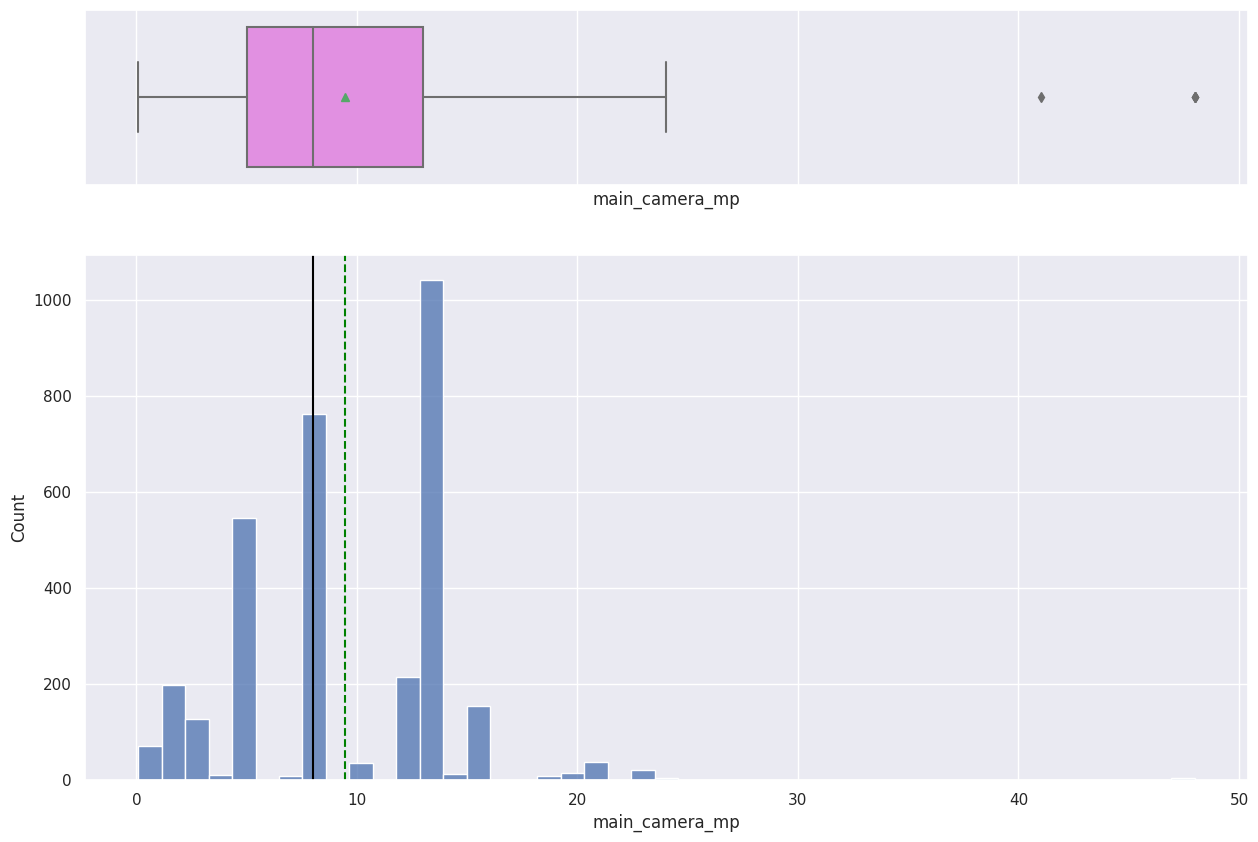

In [19]:
histogram_boxplot(df,"main_camera_mp")

# Observation:
The distribution for 'main_camera_mp'is right-skewed.
There are 2 outliers on the right side.

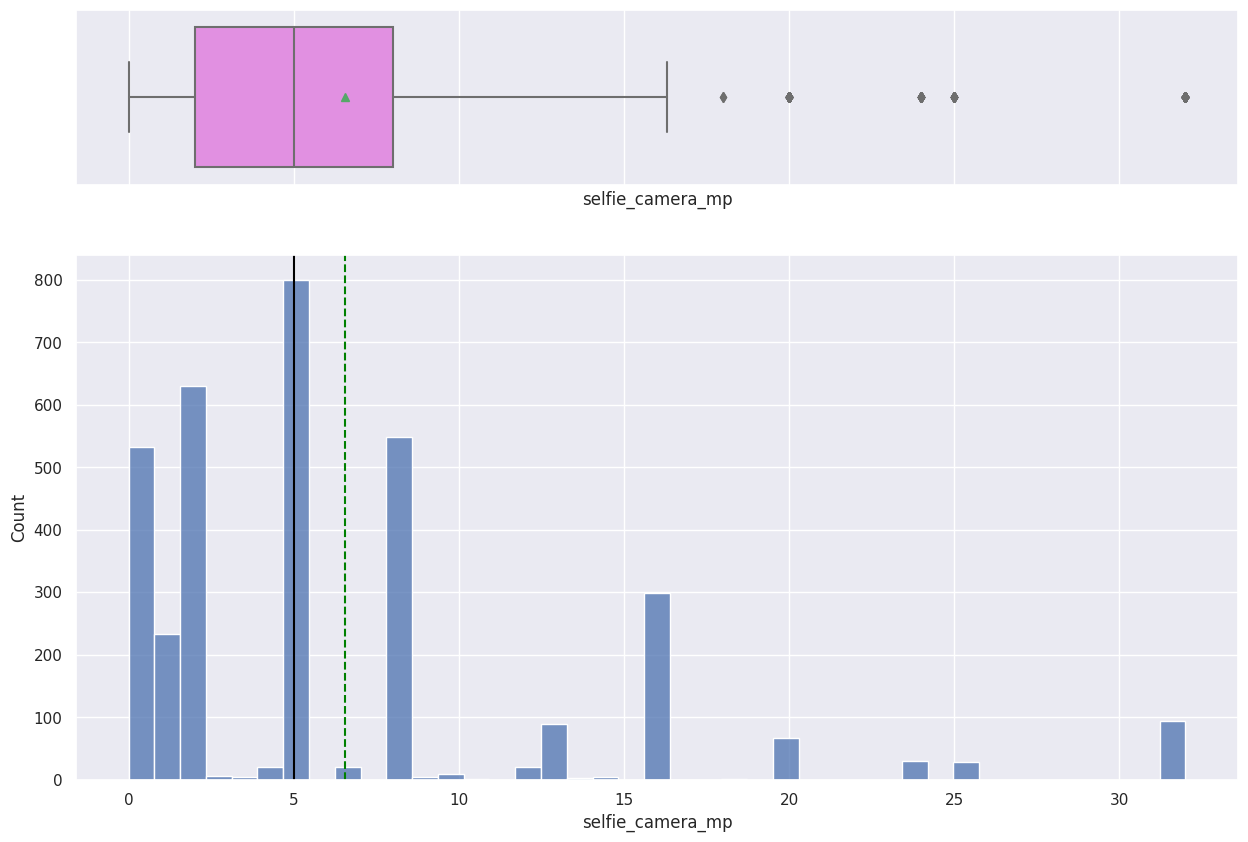

In [20]:
#selfie_camera_mp
histogram_boxplot(df,"selfie_camera_mp")

# Observation:

The distribution for 'selfie_camera_mp'is right-skewed.

There are a few outliers on the right side.

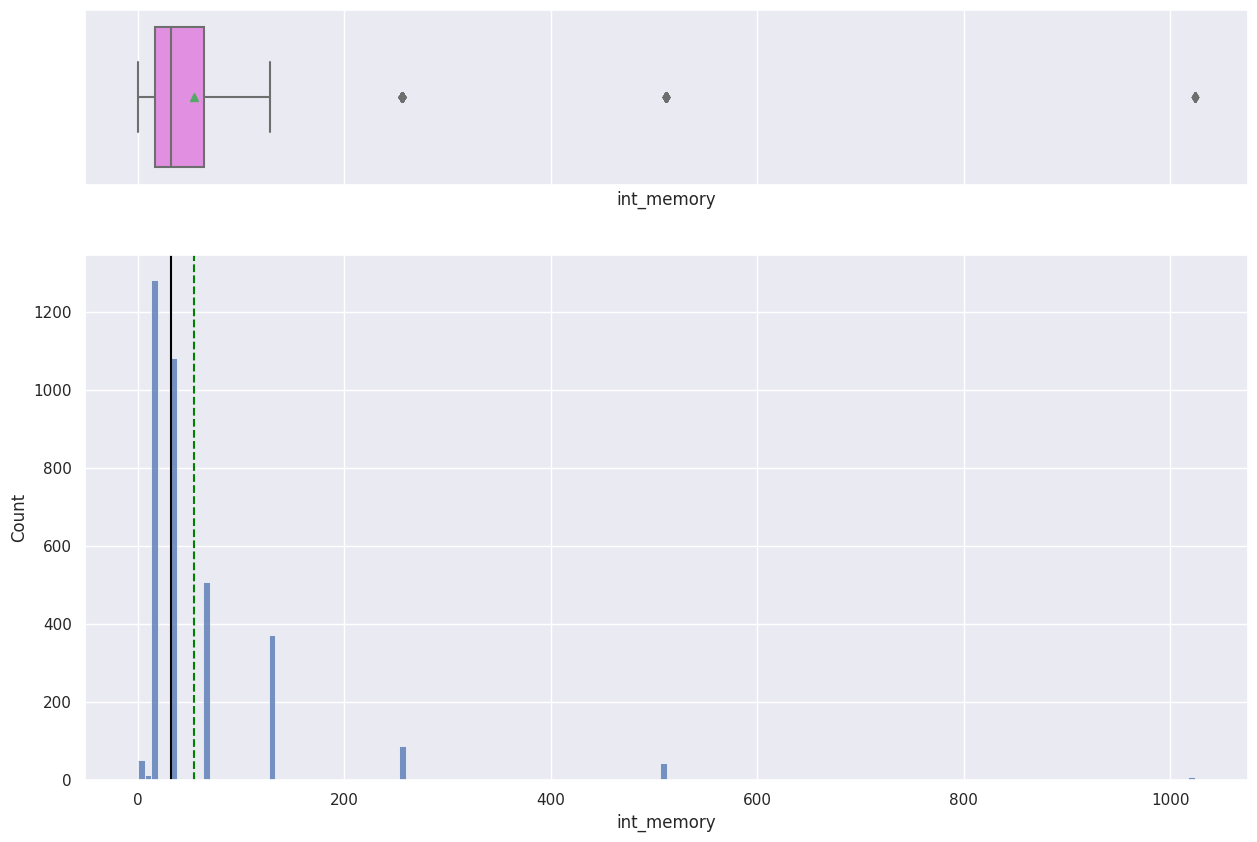

In [21]:
# int_memory
histogram_boxplot(df, "int_memory")

# Observation:
The distribution for 'int_memory'is heavily right-skewed.

There are 3 outliers on the right side.

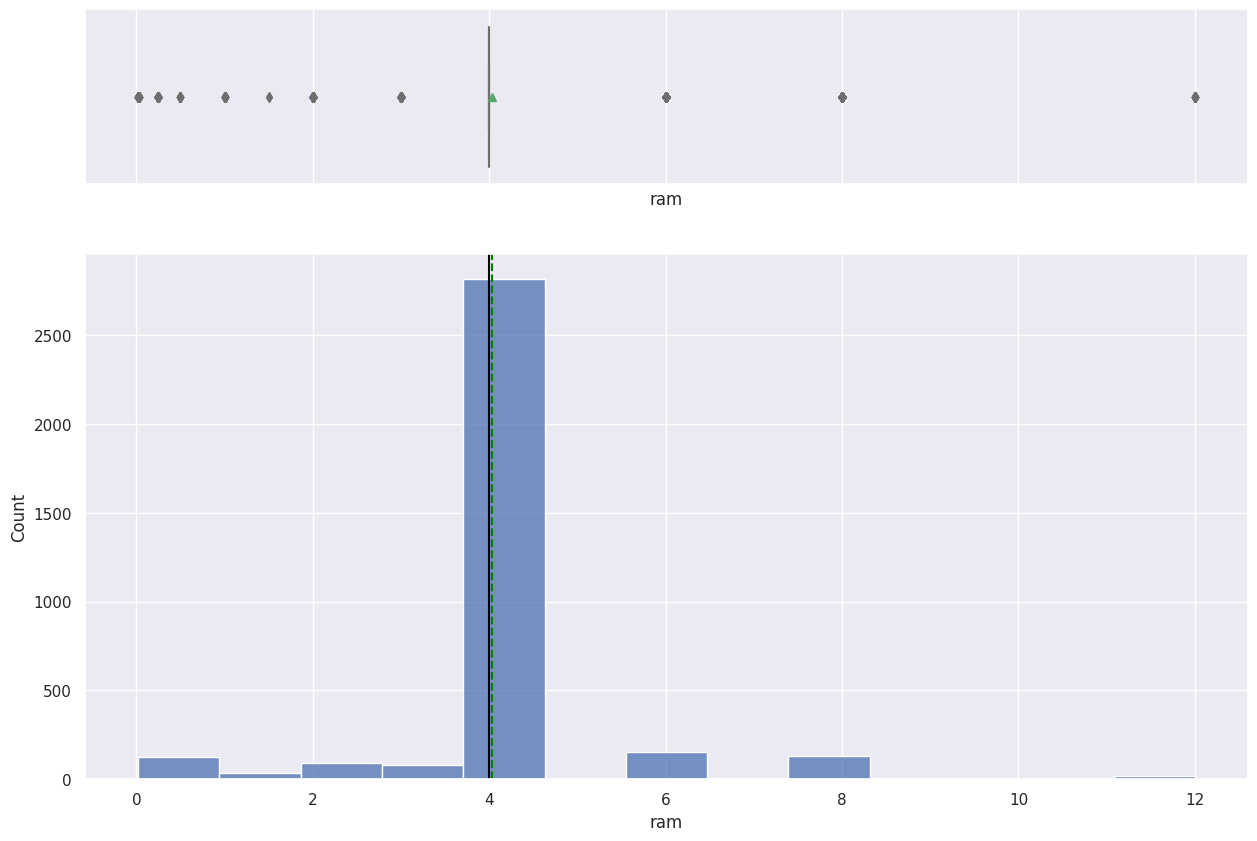

In [22]:
# ram
histogram_boxplot(df, "ram")

# Observation:
The distribution for 'ram' is normally distributed.

There are some outliers on the sides.

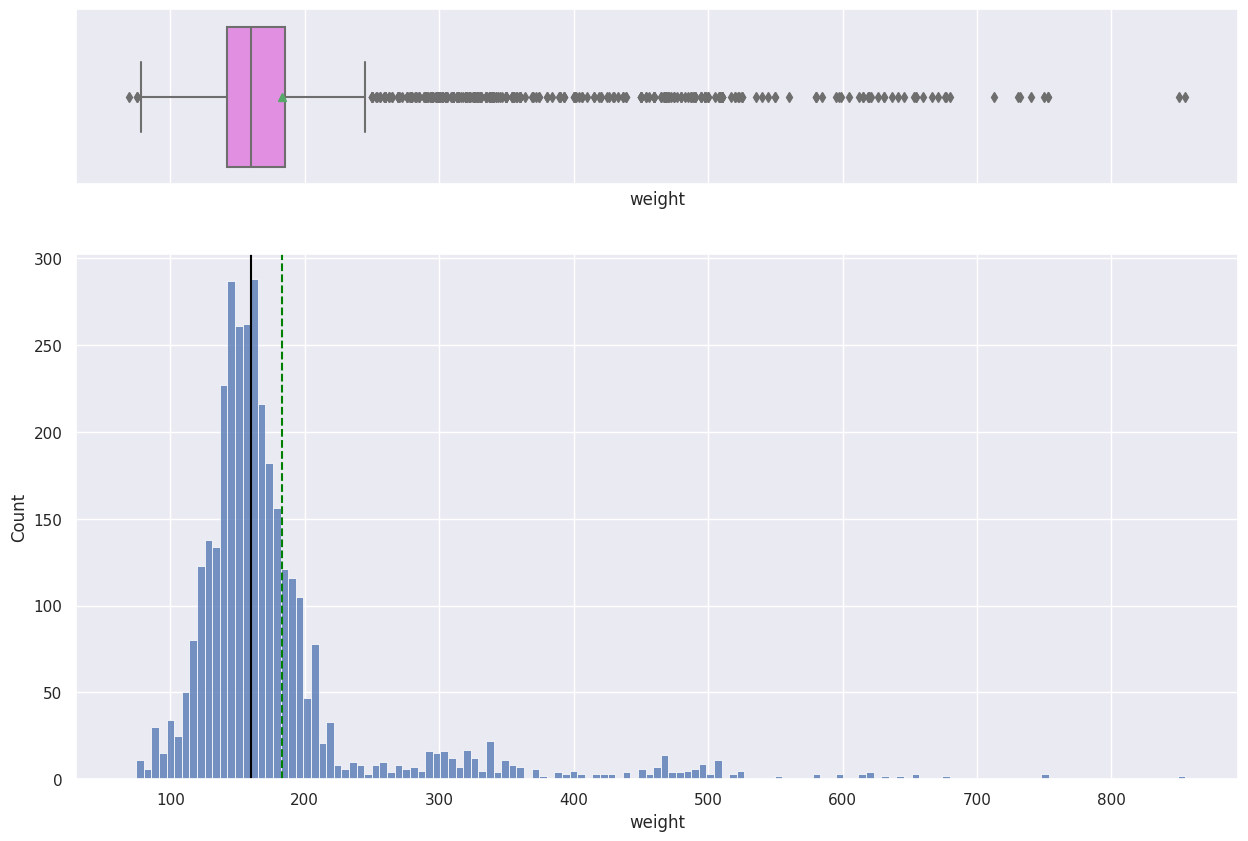

In [23]:
#weight
histogram_boxplot(df, "weight")

# Observation:
The distribution for 'weight'is right-skew distributed.

There are many outliers on the right side and 2 outliers on the left side.

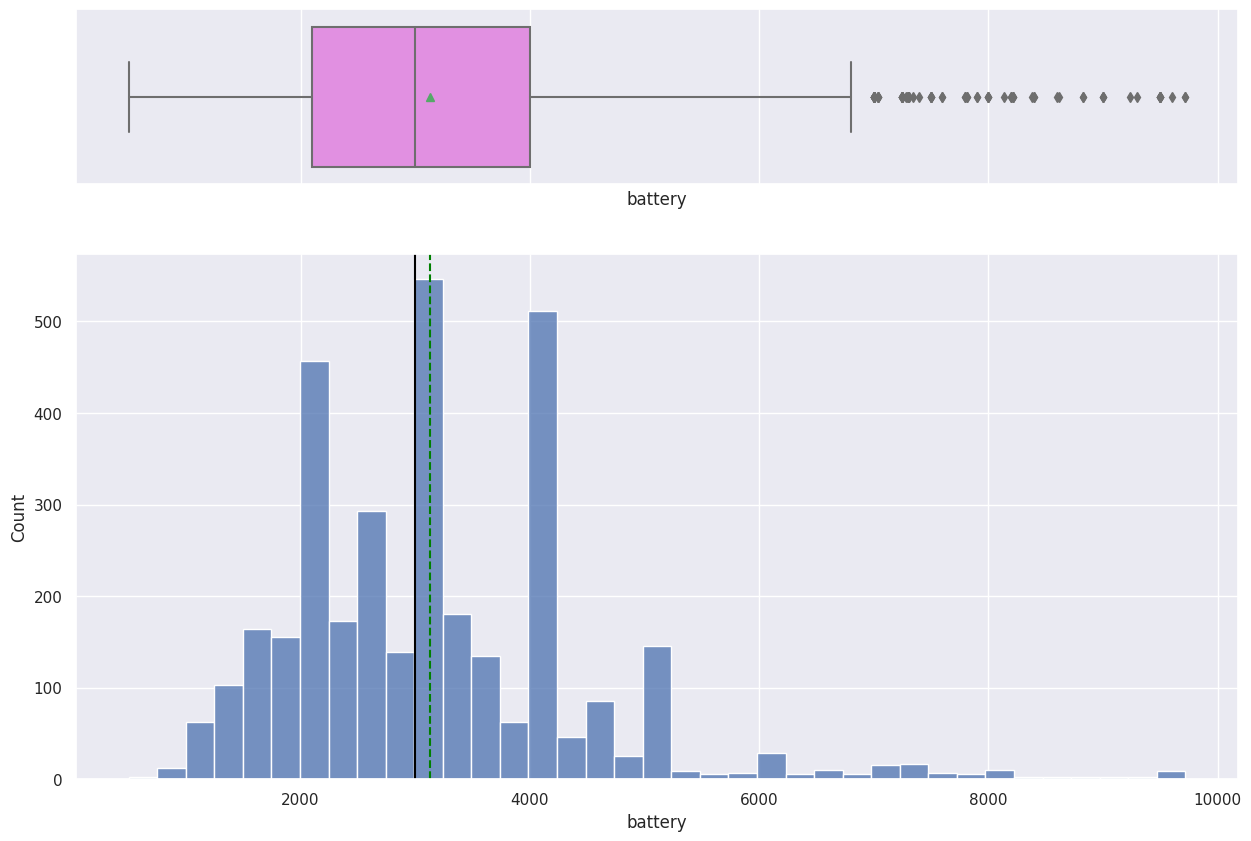

In [24]:
# battery
histogram_boxplot(df,"battery")

# Observation:
The distribution for 'battery'is right-skew distributed.

There are many outliers on the right side.

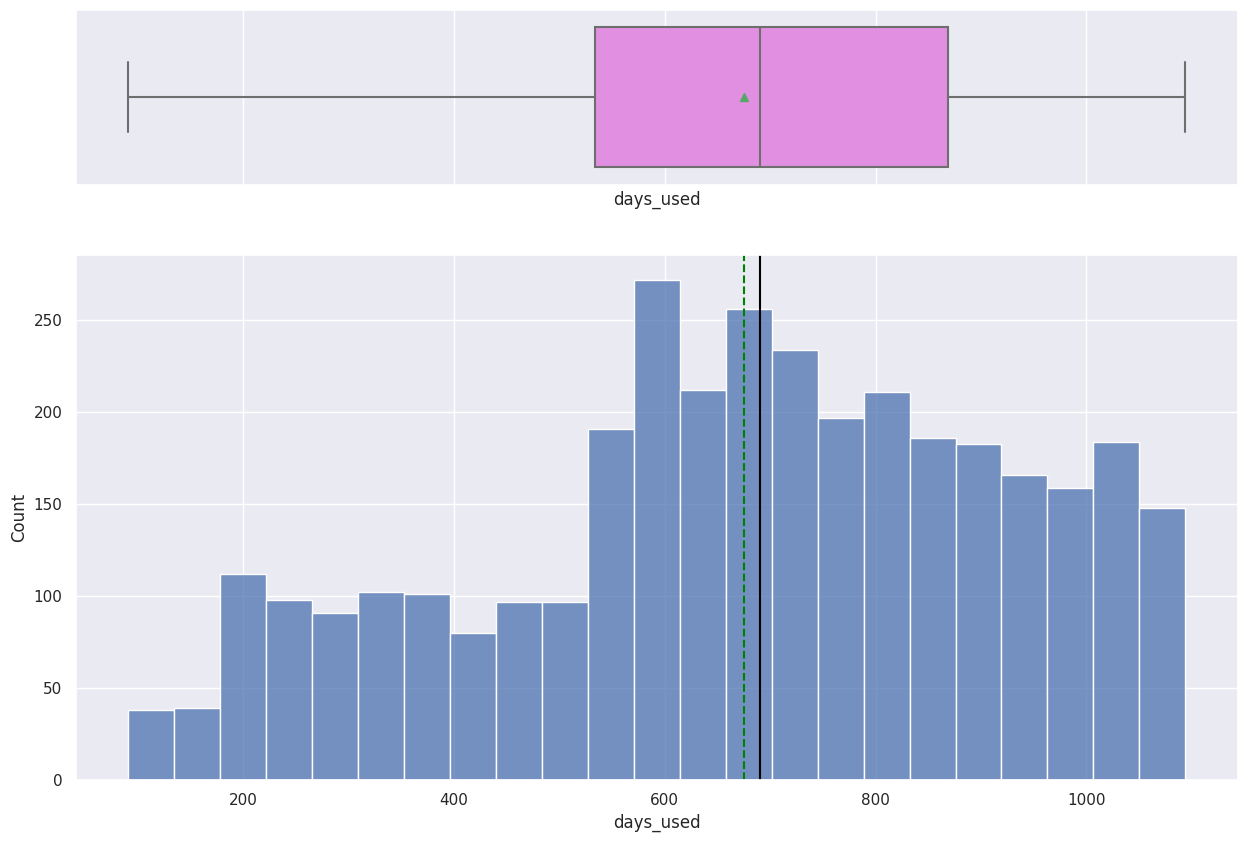

In [25]:
#days_used
histogram_boxplot(df,"days_used")

# Observation:
The distribution for 'days_used'is slightly left-skew distributed.

There are no outliers on both sides.








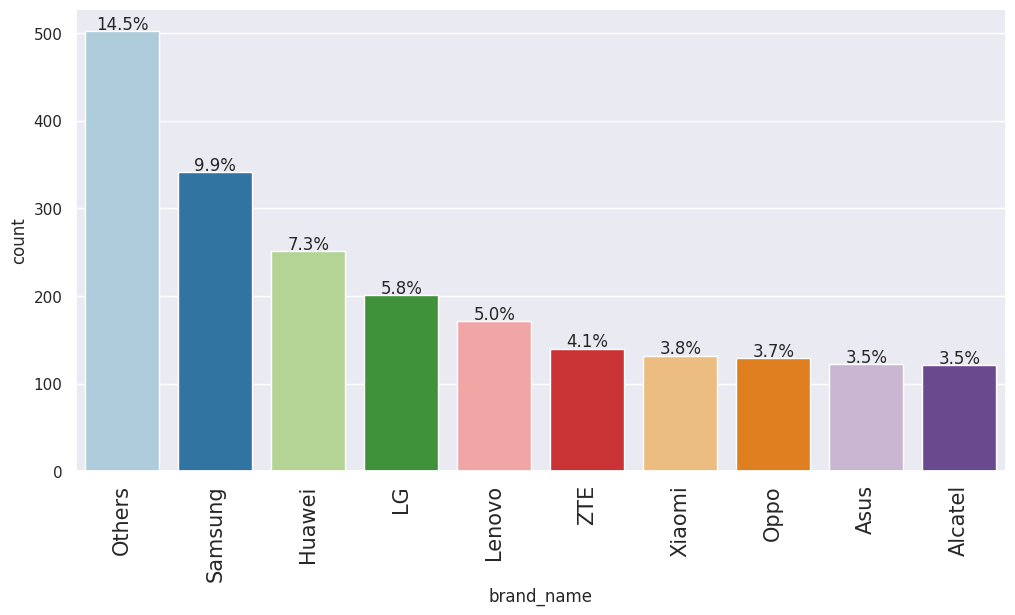

In [26]:
#brand_name
labeled_barplot(df, "brand_name", perc=True, n=10)

Observation:

Samsung has the high percentage (9.9%) in the used devices, implying that it is popular in the market. Others brand is about 14.5% in the data.

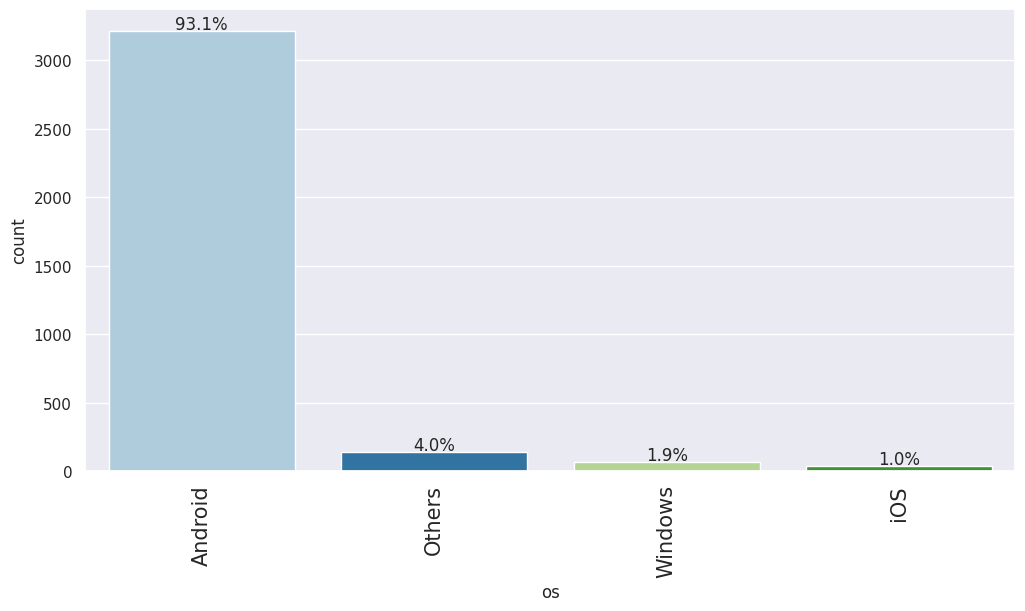

In [27]:
#os
labeled_barplot(df,"os",perc=True, n=10)

Observation:

93.1% of the refurbished/used devices is Android, whereas only 1% is ISO.

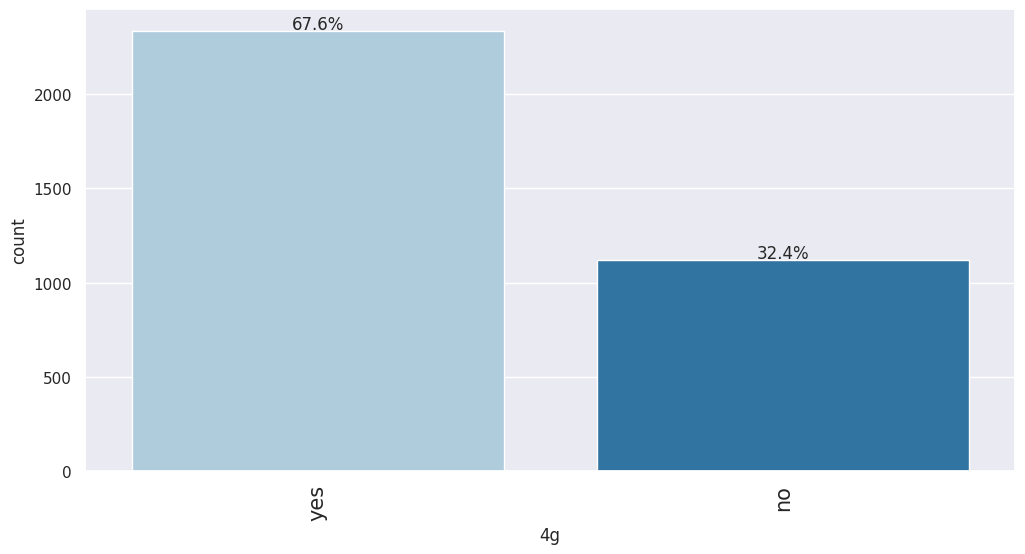

In [28]:
#4g
labeled_barplot(df, "4g",perc=True, n=10)

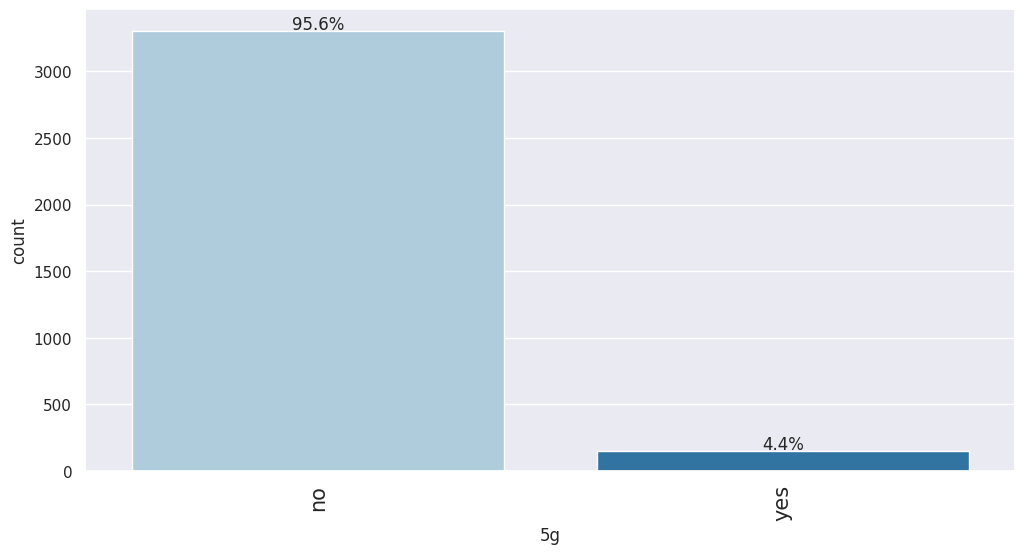

In [29]:
#5g
labeled_barplot(df, "5g",perc=True, n=10)

# 2. What percentage of the used device market is dominated by Android devices?

Android devices dominates 93.1% of the used device market , showing a significance of Android in the market.

# Observations:

4G is more common to have compared with 5G, only 4.4% found in the used devices.

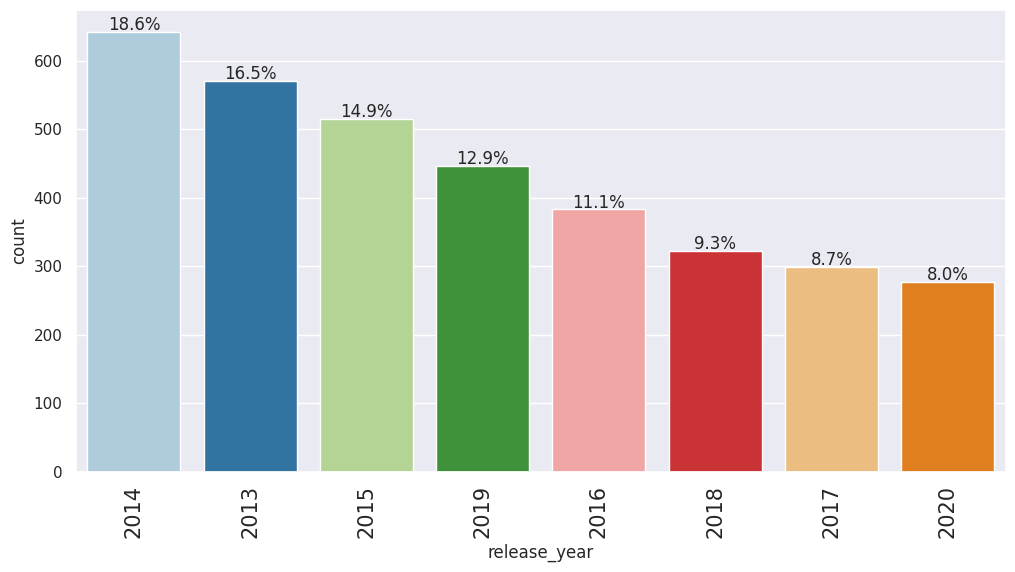

In [30]:
#release_year
labeled_barplot(df,"release_year",perc=True, n=10)

Observations:

Most of the used devices was released in 2014 , 18.6%.

# Bivariate Analysis

Correlation Check

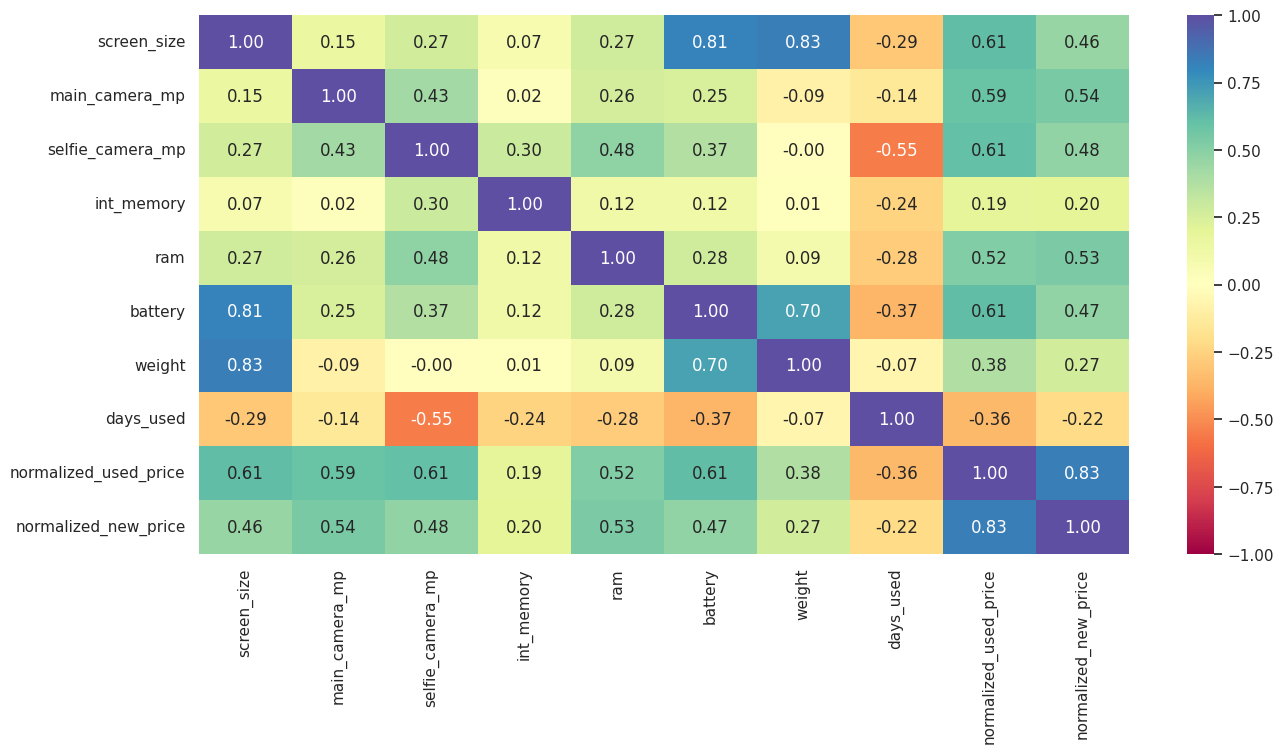

In [31]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

# Observations:

Battery and Screen_size are strongly positively correlated with correlation of 0.81

Weight and screen size are strongly positively correlated with correlation of 0.83

normalized_new_price and normalized_used_price are also strongly positively correlated with correlation of 0.83

There is a negative correlation between days_used and selfie_camera , with correlation of -0.55

There is a negative correlation between days_used and battery , with correlation of -0.37

There is a negative correlation between days_used and normalized_used_price , with correlation of -0.36

# 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?


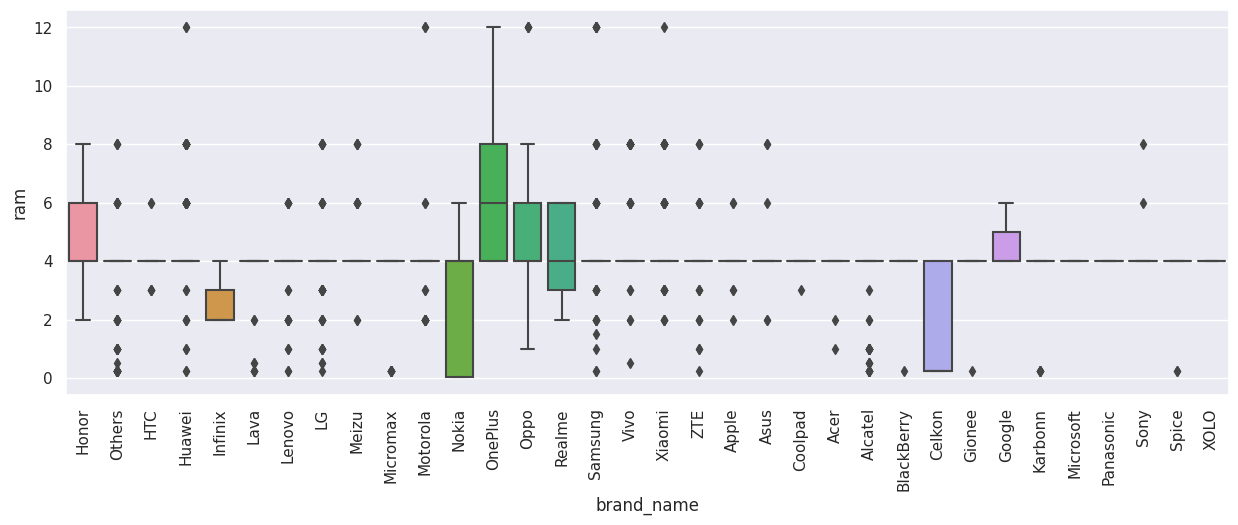

In [32]:
# check how the amount of RAM vary with the brand
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

# Observation

OnePlus has more RAMS in their devices.

# 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [33]:
# create a new dataframe for those devices which offer a large battery (more than 4500 mAh)
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

In [34]:
df_large_battery["brand_name"].value_counts()

Samsung      50
Others       41
Huawei       37
Xiaomi       31
Lenovo       28
Asus         22
Apple        17
Honor        14
Motorola     14
Vivo         13
LG           12
Realme       12
Gionee       10
ZTE          10
Acer          7
Infinix       6
Sony          6
Oppo          4
Alcatel       1
Google        1
HTC           1
Micromax      1
Nokia         1
Panasonic     1
Spice         1
Name: brand_name, dtype: int64

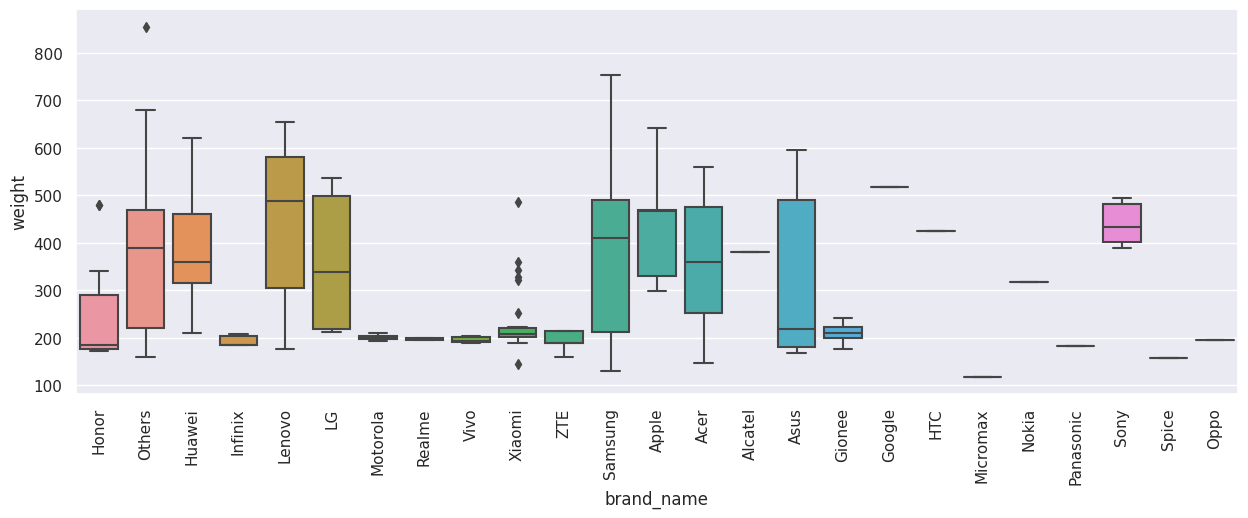

In [35]:
# brand vs weight
plt.figure(figsize=(15, 5))
sns.boxplot(x="brand_name",y="weight",data=df_large_battery )
plt.xticks(rotation=90)
plt.show()

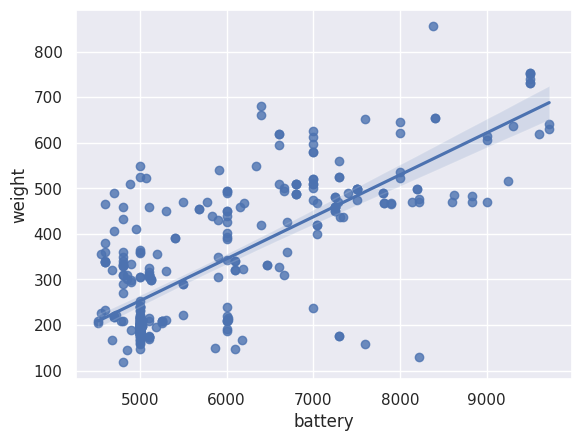

In [36]:
# battery vs weight
sns.regplot(x="battery", y ="weight", data=df_large_battery );

Observations:
The Samsung offer most of their devices large batteries with more than 4500 mAh.

As battery capacity increases weight increase , therefore Samaung devices are also heavier than other brands devices.

# 5.Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [37]:
# create a new dataframe for those devices with big screen size larger than 6inches
df_big_screen = df[df.screen_size > 6 * 2.54]
df_big_screen.shape

(1099, 15)

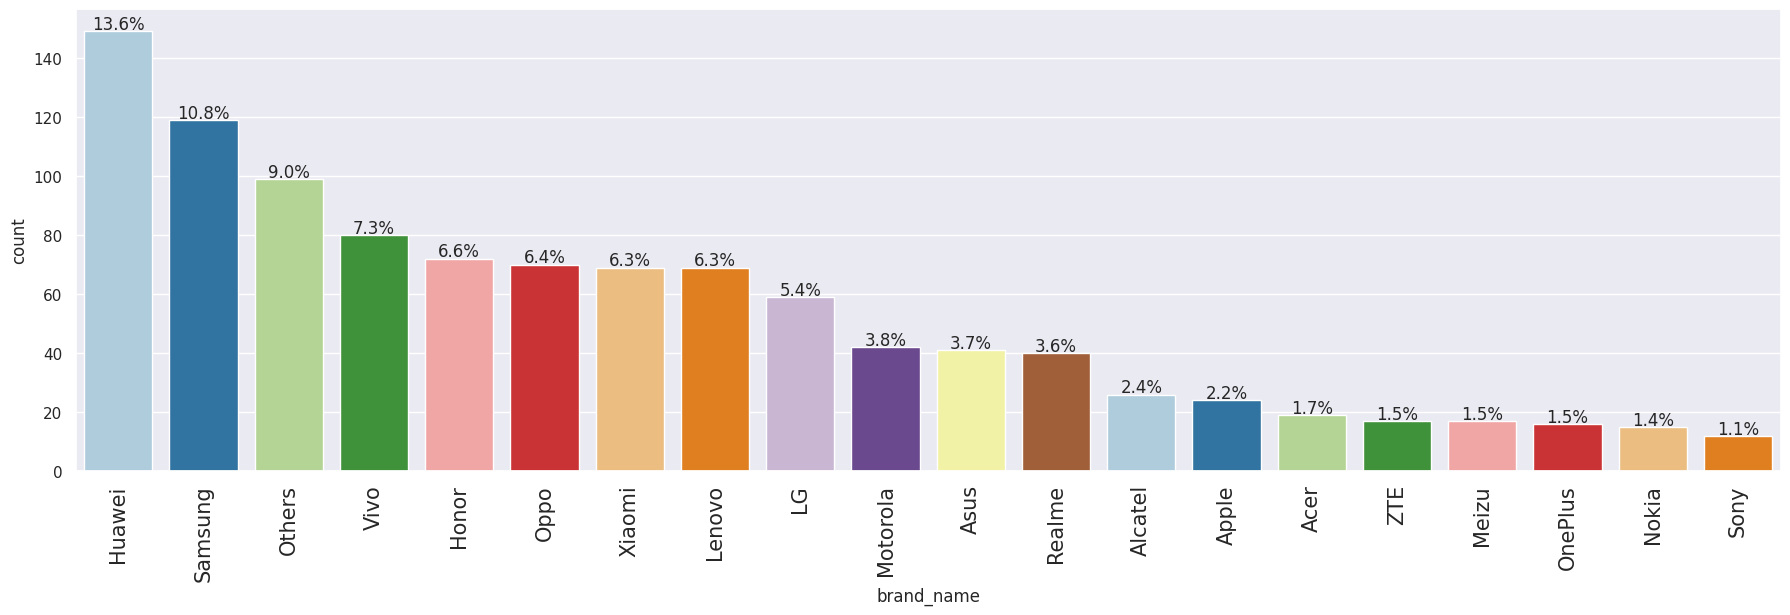

In [38]:
labeled_barplot(df_big_screen ,"brand_name",perc=True, n=20)

# Observations:




Huawei offers the highest percentage of devices with a screen size larger than 6 inches. This is suitable for those who would like to use their devices for entertainment or better view experience with larger screen with the devices.

# 6.A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [39]:
# create a new dataframe for those devices with offering greater than 8MP selfie cameras
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

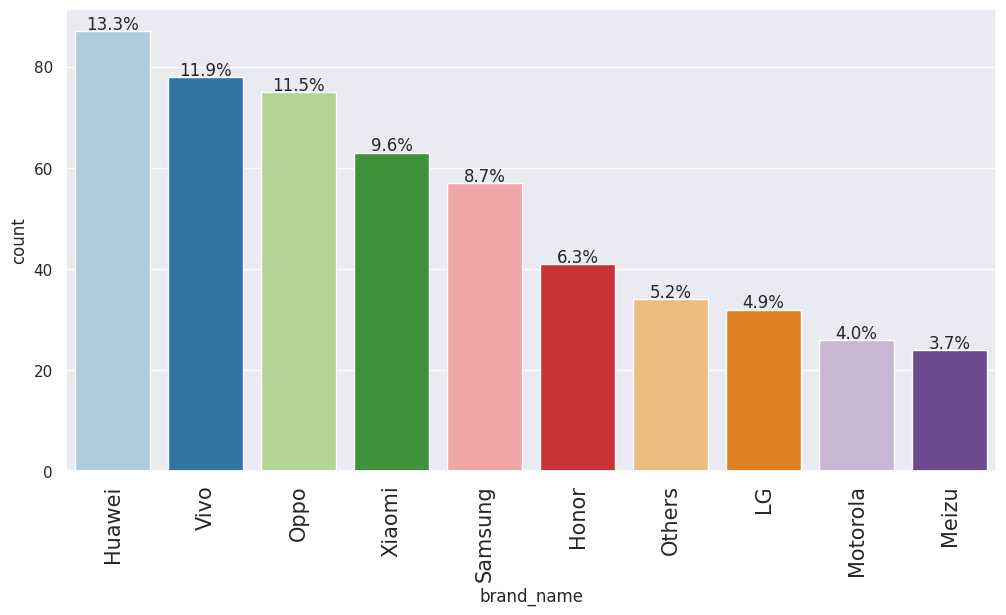

In [40]:
labeled_barplot(df_selfie_camera,"brand_name",perc=True,n=10)

# Observations:

Huawei offers the highest percentage of devices greater than 8MP selfie cameras for higher quality of selfie pictures.

#  Like good quality of selfie camera , people also prefer to have good quality of rear camera with greater than 16MP.

In [41]:
# similar analysis for rear cameras with greater than 16 MP
# create a new dataframe for those devices with offering greater than 16M rear cameras
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

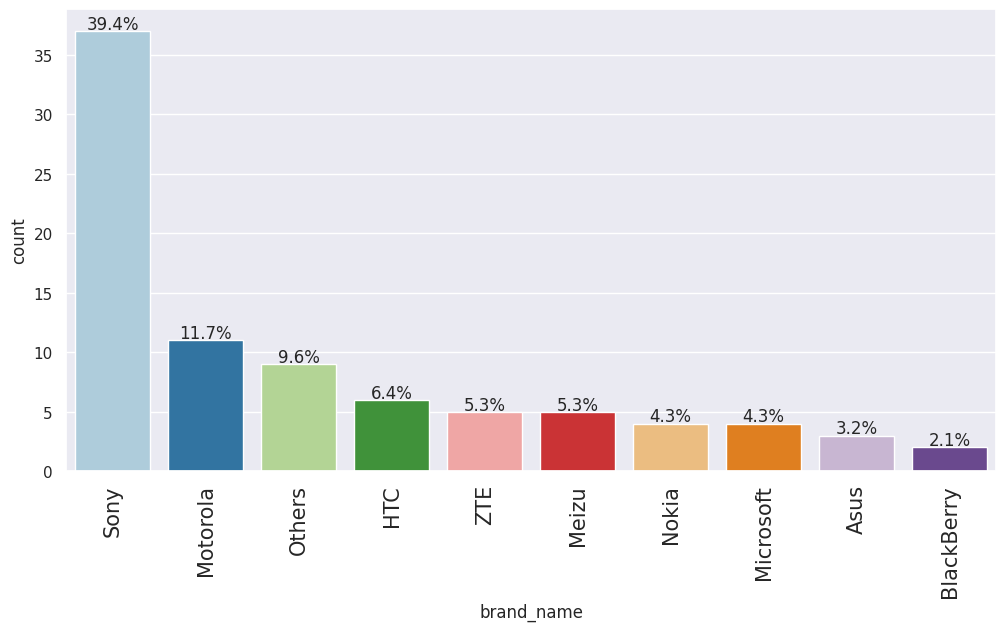

In [42]:
labeled_barplot(df_main_camera,"brand_name",perc=True,n=10)

# Observations:
Sony has the highest percentage of devices with rear camera greater than 16MP.

# 7. Which attributes are highly correlated with the normalized price of a used device?

From the heatmap analysis, normalized_new_price and normalized_used_price are strongly positively correlated with correlation of 0.83.

First to see how the price of used devices varies across the years

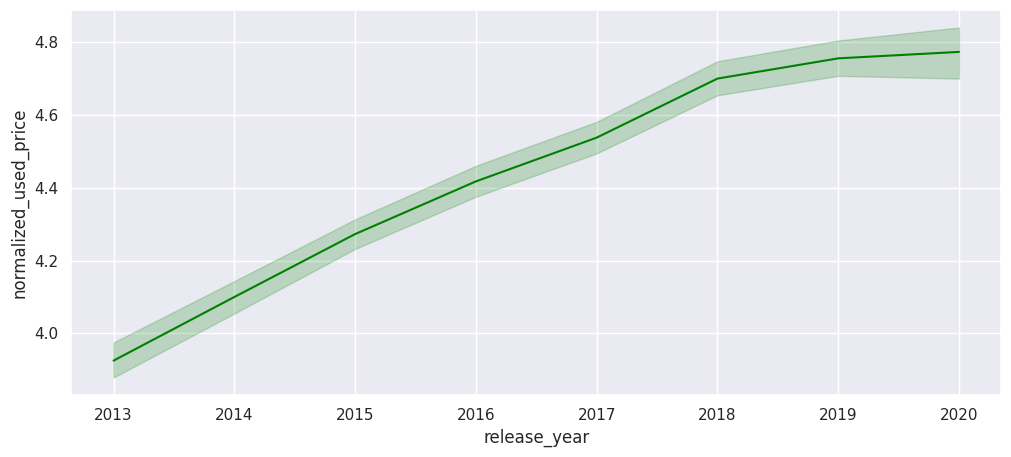

In [43]:
# create a lineplot for release year and used price
plt.figure(figsize=(12, 5))
sns.lineplot(x="release_year", y="normalized_used_price", data=df, color='green')
plt.show()

# Observation:

From the line plot, it shows that the price of refurbished phones shows an increasing trend over the years. This implies that the more recent of the release year the higher the price.

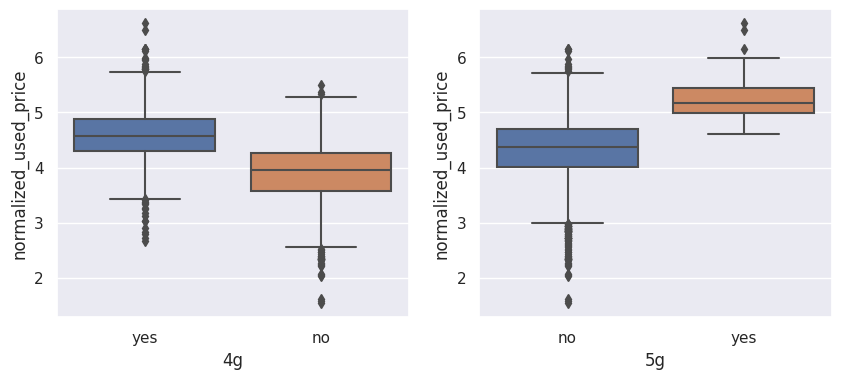

In [44]:
# check other attributes are correlated with the normalized price of a used device such as 4G and 5G networks
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

# Observation:

With 4G or 5G technology, the price of refurbished phones is higher than without such technology.


## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [45]:
# create a copy of the data
df1 = df.copy()

In [46]:
# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

# Observation:

Ther are many missing values in the columns like main_camera_mp.

# Missing value treatment

- impute the missing values in the data by the column medians grouped by release_year and brand_name.

In [47]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["release_year","brand_name"])[col].transform("median")
    )
# checking for missing values after imputing
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are still missing values.
now impute these missing values with by the column medians grouped by brand_name

In [48]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    )

# checking for missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

There are still missing values. now impute these missing values by the column medians grouped by main_camera_mp   

In [49]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# checking for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

There is no missing values.

# Feature Engineering

Let's create a new column years_since_release from the release_year column.
We will consider the year of data collection, 2021, as the baseline.
We will drop the release_year column.

In [50]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

# Outlier Check

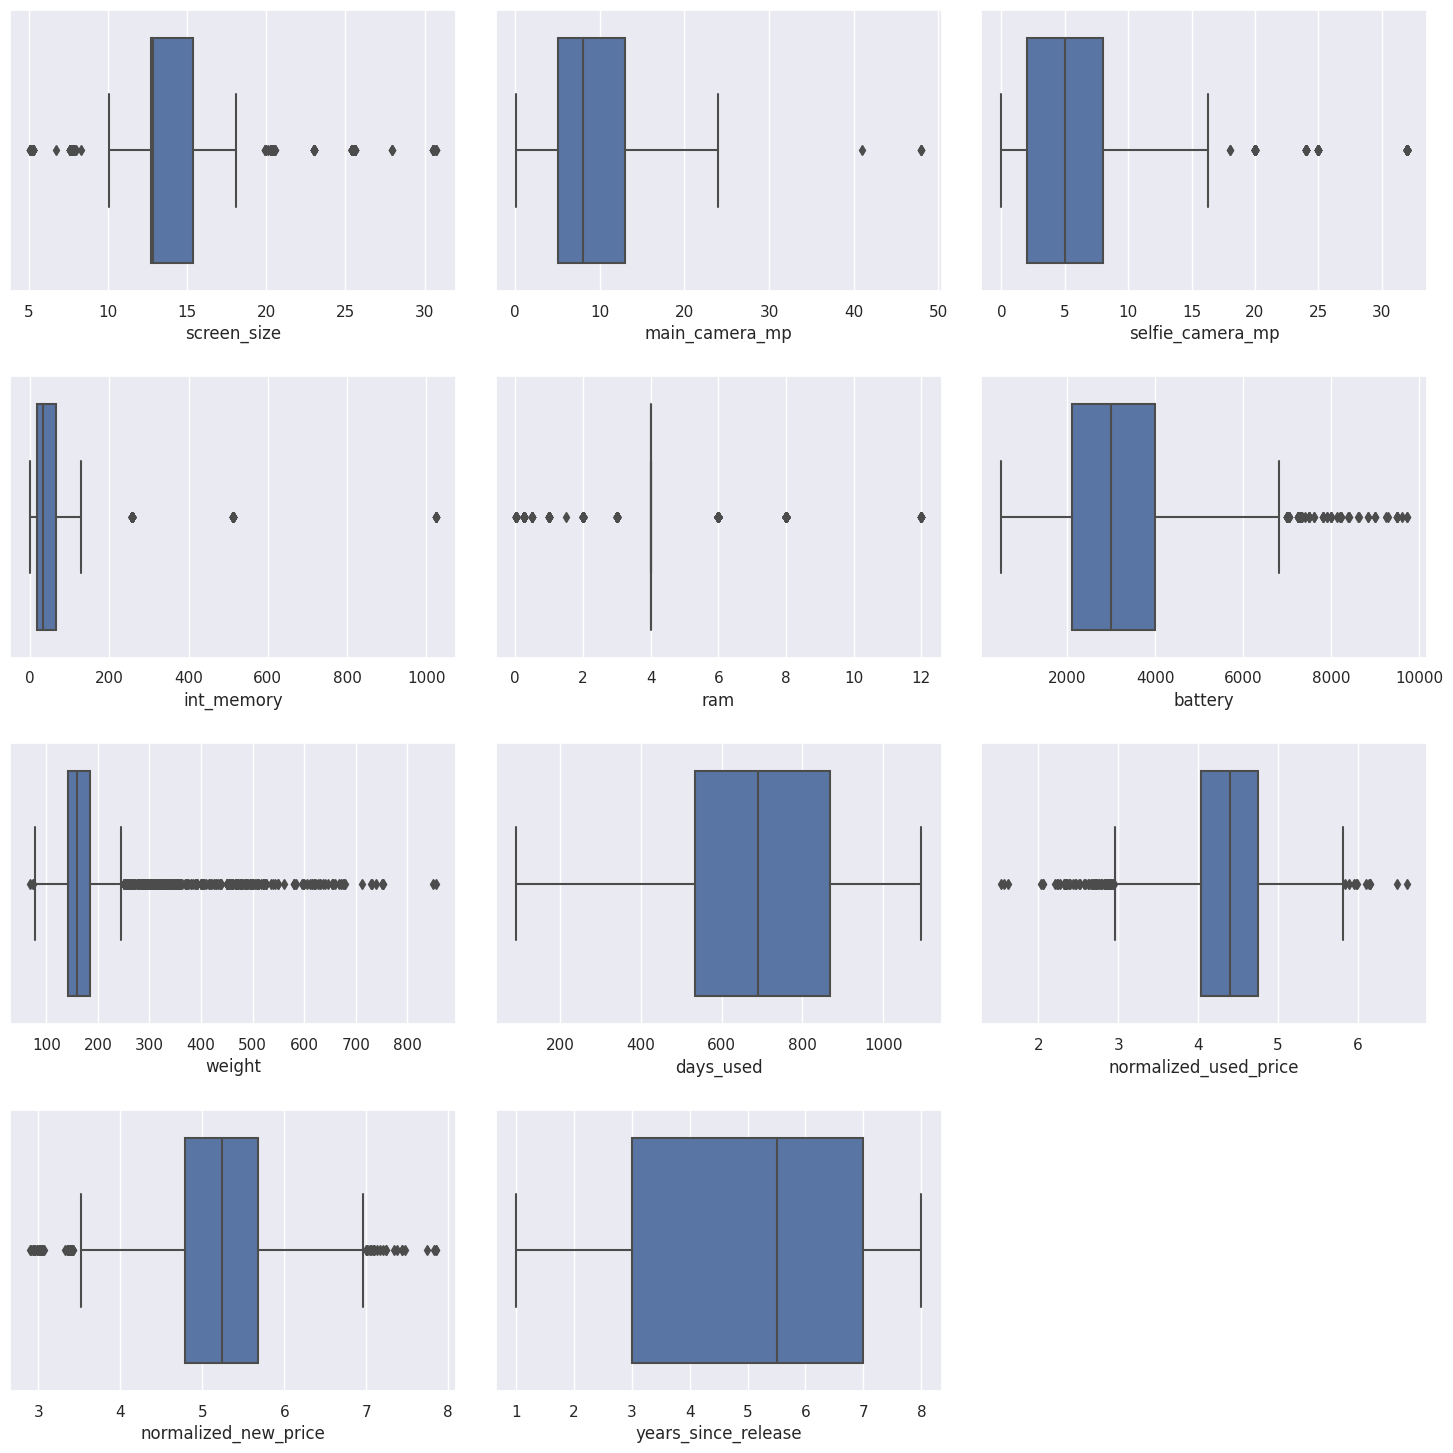

In [51]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

# Observation
There are outliers presents in all numerical columns except for "days_used"and years_since_release"

However, we will not treat them as they are proper values.

We will drop the columns breand_name as they contain a lot of text and too many unique values, and can be excluded from modeling.



In [52]:
# check the statistical summary once again
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3454.0,9.617597,4.749438,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3454.0,6.555067,6.968440,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3454.0,54.528474,84.934991,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3454.0,4.032620,1.368598,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3454.0,3132.577446,1298.884193,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3454.0,182.636856,88.360445,69.000000,142.000000,160.000000,185.000000,855.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433
normalized_new_price,3454.0,5.233107,0.683637,2.901422,4.790342,5.245892,5.673718,7.847841


In [53]:
# check df1 has no missing values as required
df1.isnull().sum().sum()

0

In [54]:
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


In [55]:
# Before preparing data for modeling, Let us go ahead and drop the brand_name column

df1["brand_name"].nunique()

34

This column has categories(34) which means after creating dummies, many columns will be formed.
This information in the brand name column can be grouped int os which column we already have and with fewer unique values.

In [56]:
df1.drop(["brand_name"], axis=1, inplace=True)
df1.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


In [57]:
# check datatypes after dropping the "brand_name" column
df1.dtypes

os                        object
screen_size              float64
4g                        object
5g                        object
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
weight                   float64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
years_since_release        int64
dtype: object

# Data Preparation for Modeling

We want to predict the price of a used phone/tablet.

Before we proceed to build a model, we will have to encode categorical features.

We will split the data into train and test to be able to evaluate the model that we build on the train data.

We will build a Linear Regression model using the train data and then check.

In [58]:
# defining X and y variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1 ["normalized_used_price"]

print(X.head())
print()
print(y.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        14.50  yes   no            13.0               5.0   
1  Android        17.30  yes  yes            13.0              16.0   
2  Android        16.69  yes  yes            13.0               8.0   
3  Android        25.50  yes  yes            13.0               8.0   
4  Android        15.32  yes   no            13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_new_price  \
0        64.0  3.0   3020.0   146.0        127              4.715100   
1       128.0  8.0   4300.0   213.0        325              5.519018   
2       128.0  8.0   4200.0   213.0        162              5.884631   
3        64.0  6.0   7250.0   480.0        345              5.630961   
4        64.0  3.0   5000.0   185.0        293              4.947837   

   years_since_release  
0                    1  
1                    1  
2                    1  
3                    1  
4              

In [59]:
# let's add the intercept to data
X = sm.add_constant(X)

In [60]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1,0,0,0,1,0


In [61]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [62]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     850.5
Date:                   Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                           11:18:39   Log-Likelihood:                 98.614
No. Observations:                   2417   AIC:                            -165.2
Df Residuals:                       2401   BIC:                            -72.58
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

# Interpreting the Regression Results:


1. Adjusted. R-squared: It reflects the fit of the model.
*   Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
*   In our case, the value for adj. R-squared is 0.841, which is good.

2. const coefficient: It is the Y-intercept.
It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient.
In our case, the value for const coefficient is 1.3703

3. Coefficient of a predictor variable: It represents the change in the output Y due to a change in the predictor variable (everything else held constant)

*  In our case, the coefficient of **normalized_new_price** is **0.4215**

## Model Performance Check

Let's check the performance of the model using different metrics.

We will be using metric functions defined in sklearn for RMSE, MAE, and  𝑅2 .

We will define a function to calculate MAPE and adjusted  𝑅2 .

The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
We will create a function which will print out all the above metrics in one go.

In [63]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [64]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232297,0.18226,0.841612,0.840556,4.377609


In [65]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236589,0.183001,0.844808,0.842374,4.467715


# Observations

*   The training  𝑅2  is 0.841612, so the model is not underfitting

*   The train and test RMSE and MAE are comparable, so the model is not overfitting either

*   MAE suggests that the model can predict the normalized price of the used decives a mean error of 0.18 on the test data

*   MAPE of 4.47 on the test data means that we are able to predict within  4.47% of the normalized price of the used decives

## Checking Linear Regression Assumptions

* In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied. We will be checking the following Linear Regression assumptions:

No Multicollinearity

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

# TEST FOR MULTICOLLINEARITY

Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

Variance Inflation Factor (VIF): Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient  𝛽𝑘  is "inflated" by the existence of correlation among the predictor variables in the model.

If VIF is 1, then there is no correlation among the  𝑘 th predictor and the remaining predictor variables, and hence, the variance of  𝛽𝑘  is not inflated at all.

General Rule of thumb:

If VIF is between 1 and 5, then there is low multicollinearity.

If VIF is between 5 and 10, we say there is moderate multicollinearity.

If VIF is exceeding 10, it shows signs of high multicollinearity.

In [66]:
# Let's define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [67]:
checking_vif(x_train)

,feature,VIF
0,const,124.287701
1,screen_size,7.245006
2,main_camera_mp,1.996930
3,selfie_camera_mp,2.575590
4,int_memory,1.247856
5,ram,2.117161
6,battery,3.848932
7,weight,6.127196
8,days_used,2.578113
9,normalized_new_price,2.632565


# Observations:

The VIF of screen_size and  weight is greater than 5, there is moderate multicollinearity.

We will systematically drop numerical columns with VIF > 5 , for screen_size and  weight columns

We will ignore the VIF values for dummy variables and the constant (intercept)

# Removing Multicollinearity

To remove multicollinearity

Drop every column one by one that has a VIF score greater than 5.

Look at the adjusted R-squared and RMSE of all these models.

Drop the variable that makes the least change in adjusted R-squared.

Check the VIF scores again.

Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [68]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [69]:
col_list = ["screen_size", "weight"]
res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.837274,0.235506
1,screen_size,0.836820,0.235834


In [70]:
col_to_drop = "weight"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,107.333228
1,screen_size,3.402137
2,main_camera_mp,1.903762
3,selfie_camera_mp,2.541463
4,int_memory,1.247526
5,ram,2.113643
6,battery,3.469627
7,days_used,2.564951
8,normalized_new_price,2.626262
9,years_since_release,4.466062



We have dealt with multicollinearity in the data

Let's rebuild the model using the updated set of predictors variables

In [71]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     888.9
Date:                   Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                           11:18:40   Log-Likelihood:                 72.978
No. Observations:                   2417   AIC:                            -116.0
Df Residuals:                       2402   BIC:                            -29.10
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observations**

- We can see that adj. R-squared has dropped from 0.841 to 0.837, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

# Dropping high p-value variables

Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them

But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once

Instead, we will do the following:
Build a model, check the p-values of the variables, and drop the column with the highest p-value

Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value

Repeat the above two steps till there are no columns with p-value > 0.05

Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [72]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'years_since_release', '4g_yes']


In [73]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [74]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1556.
Date:                   Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                           11:18:40   Log-Likelihood:                 70.534
No. Observations:                   2417   AIC:                            -123.1
Df Residuals:                       2408   BIC:                            -70.96
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [75]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235011,0.184164,0.837889,0.837283,4.417875


In [76]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238672,0.184313,0.842064,0.84068,4.491491


# Observations

Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and olsmod2 as the final model to move forward with

Now adjusted R-squared is 0.837, i.e., our model is able to explain ~83.7% of the variance

The adjusted R-squared in olsmod1 (where we considered the variables without multicollinearity) was 0.837.This shows that the variables we dropped were not affecting the model.

RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting.


# Now we'll check the rest of the assumptions on olsmod2.

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

## TEST FOR LINEARITY AND INDEPENDENCE

Why the test?

Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
The independence of the error terms (or residuals) is important.

If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

How to check linearity and independence?

Make a plot of fitted values vs residuals.

If they don't follow any pattern, then we say the model is linear and residuals are independent.

Otherwise, the model is showing signs of non-linearity and residuals are not independent.

How to fix if this assumption is not followed?

We can try to transform the variables and make the relationships linear.

In [77]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.864746,0.222741
1525,4.448399,4.571687,-0.123288
1128,4.315353,4.284426,0.030926
3003,4.282068,4.258956,0.023112
2907,4.456438,4.451207,0.005231


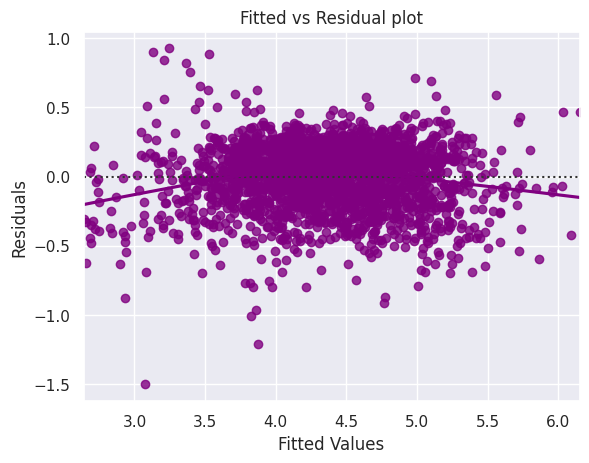

In [78]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

# TEST FOR NORMALITY

Why the test?

Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

How to check normality?

The shape of the histogram of residuals can give an initial idea about the normality.
It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
Other tests to check for normality includes the Shapiro-Wilk test.
Null hypothesis: Residuals are normally distributed
Alternate hypothesis: Residuals are not normally distributed

How to fix if this assumption is not followed?

We can apply transformations like log, exponential, arcsinh, etc. as per our data.

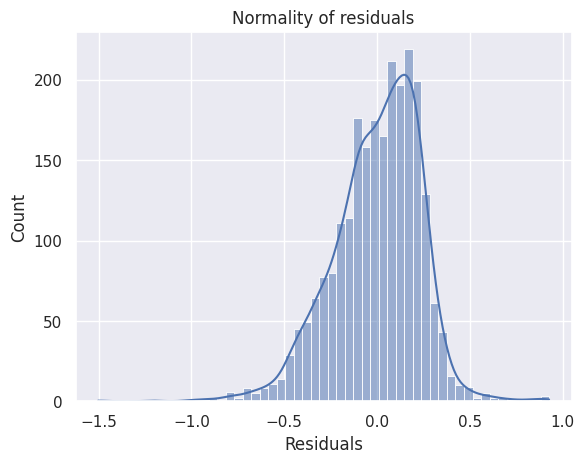

In [79]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

The histogram of residuals does have a bell shape.

Let's check the Q-Q plot.

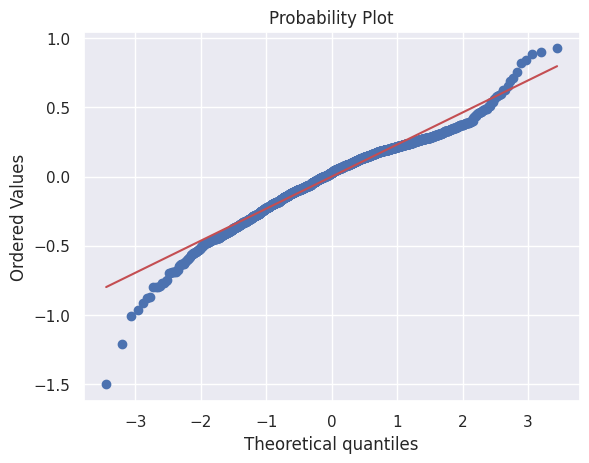

In [80]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The residuals more or less follow a straight line except for the tails.

Let's check the results of the Shapiro-Wilk test.

In [81]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9712689518928528, pvalue=1.2969799215209546e-21)

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.

Strictly speaking, the residuals are not normal.

However, as an approximation, we can accept this distribution as close to being normal.

So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY



**Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [82]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0648757500800878), ('p-value', 0.13825250199575034)]

Since p-value > 0.05, we can say that the residuals are homoscedastic.
So, this assumption is satisfied.

# Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction

In [83]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.377852
2341,3.696103,3.960691
1913,3.592093,3.766597
688,4.306495,4.104456
650,4.522115,5.122448
2291,4.259294,4.398194
40,4.997685,5.410093
1884,3.875359,4.111013
2538,4.206631,4.049228
45,5.380450,5.307608


We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [84]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [85]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1556.
Date:                   Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                           11:18:43   Log-Likelihood:                 70.534
No. Observations:                   2417   AIC:                            -123.1
Df Residuals:                       2408   BIC:                            -70.96
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [86]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235011,0.184164,0.837889,0.837283,4.417875


In [87]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238672,0.184313,0.842064,0.84068,4.491491


The model is able to explain ~83.7% of the variation in the data.

*   The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

*   The MAPE on the test set suggests we can predict within 4.49% of the normalized price of the used devices

Hence, we can conclude the model olsmodel_final is good for prediction as well as inference purposes.

## Actionable Insights and Recommendations

# Insights
1.   The model is able to explain ~83.7% of the variation in the data and within 4.49% of the normalized price of the used devices on the test data, which is good.
> *  This indicates that the model is good for prediction as well as inference purposes.

2. If a unit increase in normalized_new_price , then the normalized_used_price of the used device increases by 0.4255 units, all other variables held constant.

3. We can see that screen_size, main_camera_mp, selfie_camera_mp, ram and 4g_yes are significant parameters. As these increases, the normalized_used_price of the used device increases.

4. If a unit increase in years_since_release, then the normalized_used_price of the used device decreases by 0.0193 units, all other variables held constant.


# Recommendations

Based on the analysis and the context of the used and refurbished device market, here are some business recommendations for ReCell:

1. **Dynamic pricing strategy**:

By considering the significant factors identified in the analysis, such as price of a new device of the same model, screen size, camera resolution, RAM, and 4G teachnology, ReCell can adjust the prices of their used and refurbished devices accordingly. This strategy ensures that the prices are aligned with market demand and device specifications, increasing revenue while being competitive to complete with other competitors.

2. **Promote devices with desirable features**:

Focus on the promotion of those devices with the desirable features such as larger screen sizes, better camera resolutions, higher RAM, and 4G/5G teachnology. These attributes have been identified as significant factors of the device's resale price. By showcasing these features to potential customers, ReCell can attract more buyers to pay a premium for devices with such features.

3. **Consider device age in setting of pricing**:

Given that the years_since_release variable negatively impacts the normalized_used_price, ReCell should carefully consider the age of the devices when pricing them. The price of old devices should be set accordingly to the age of the used device to reflect their depreciation over time. The company can leverage the positive attributes of these devices, such as lower prices and still functional features, to target budget-conscious buyers, such as students or retired people who usually demand less features of the devices.

4. **Monitor market trends**:

Stay updated with market trends, including changes in demand for specific features or brands. Regularly assess competitor pricing strategies to remain competitive and ensure that ReCell's pricing is in line with market dynamics. Continuous monitoring allows for agile adjustments in pricing strategies based on market conditions.

By considering these recommendations and the significant factors influencing the pricing, ReCell should effectively set a dynamic pricing strategy for used and refurbished devices.


___